In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.tree import DecisionTreeRegressor #a single decision tree
from sklearn.ensemble import RandomForestRegressor #random forest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt

df = pd.read_csv('../input/melbourne-housing-snapshot/melb_data.csv')

df.describe()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [2]:
df.Price

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 13580, dtype: float64

In [3]:
df_2 = df.copy()
df_2 = df_2.dropna(axis=0)
output = df_2.Price

In [4]:
X = df_2.copy()
y = X.pop("Price")
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
discrete_features = X.dtypes == int
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

Address          1.844007
BuildingArea     0.397248
Suburb           0.392763
Postcode         0.261178
Rooms            0.257366
Bedroom2         0.232551
CouncilArea      0.219837
Type             0.195784
Propertycount    0.184318
Distance         0.173834
SellerG          0.171983
Bathroom         0.165469
Landsize         0.162078
YearBuilt        0.157013
Lattitude        0.149815
Longtitude       0.147869
Car              0.111473
Regionname       0.108764
Method           0.100614
Date             0.020361
Name: MI Scores, dtype: float64

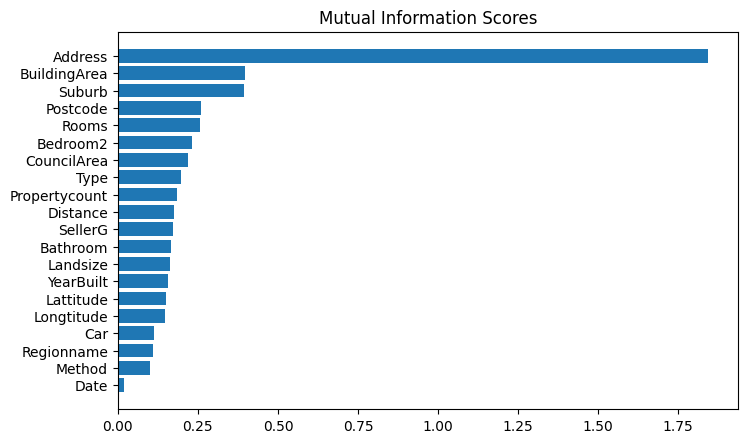

In [5]:

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [6]:
# features = ['Address','BuildingArea','Suburb','Postcode','Rooms','Bedroom2','CouncilArea','Type','Propertycount','SellerG','Distance','Landsize','YearBuilt','Bathroom','Lattitude','Longtitude','Regionname','Method','Car','Date']
features = ['Address','BuildingArea','Suburb','Postcode','Rooms','Bedroom2','CouncilArea','Type','Propertycount','SellerG','Distance','Landsize','YearBuilt','Bathroom','Lattitude','Longtitude','Regionname']
# features = ['Address','BuildingArea','Suburb','Postcode','Rooms','Bedroom2']
inputs = df_2[features]
inputs

,Address,BuildingArea,Suburb,Postcode,Rooms,Bedroom2,CouncilArea,Type,Propertycount,SellerG,Distance,Landsize,YearBuilt,Bathroom,Lattitude,Longtitude,Regionname
1,25 Bloomburg St,79.00,Abbotsford,3067.0,2,2.0,Yarra,h,4019.0,Biggin,2.5,156.0,1900.0,1.0,-37.80790,144.99340,Northern Metropolitan
2,5 Charles St,150.00,Abbotsford,3067.0,3,3.0,Yarra,h,4019.0,Biggin,2.5,134.0,1900.0,2.0,-37.80930,144.99440,Northern Metropolitan
4,55a Park St,142.00,Abbotsford,3067.0,4,3.0,Yarra,h,4019.0,Nelson,2.5,120.0,2014.0,1.0,-37.80720,144.99410,Northern Metropolitan
6,124 Yarra St,210.00,Abbotsford,3067.0,3,4.0,Yarra,h,4019.0,Nelson,2.5,245.0,1910.0,2.0,-37.80240,144.99930,Northern Metropolitan
7,98 Charles St,107.00,Abbotsford,3067.0,2,2.0,Yarra,h,4019.0,Nelson,2.5,256.0,1890.0,1.0,-37.80600,144.99540,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,30 Sherwin St,149.00,Whittlesea,3757.0,3,3.0,Whittlesea,h,2170.0,Ray,35.5,972.0,1996.0,2.0,-37.51232,145.13282,Northern Victoria
12206,75 Cecil St,115.00,Williamstown,3016.0,3,3.0,Hobsons Bay,h,6380.0,Williams,6.8,179.0,1890.0,1.0,-37.86558,144.90474,Western Metropolitan
12207,2/29 Dover Rd,35.64,Williamstown,3016.0,1,1.0,Hobsons Bay,u,6380.0,Williams,6.8,0.0,1967.0,1.0,-37.85588,144.89936,Western Metropolitan
12209,201/152 Peel St,61.60,Windsor,3181.0,2,2.0,Stonnington,u,4380.0,hockingstuart,4.6,0.0,2012.0,1.0,-37.85581,144.99025,Southern Metropolitan


In [7]:
s = (inputs.dtypes == 'object')
object_cols = list(s[s].index)
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(inputs[object_cols]))
OH_cols_train.index = inputs.index
num_X_train = inputs.drop(object_cols, axis=1)
X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
X_train.head()

,BuildingArea,Postcode,Rooms,Bedroom2,Propertycount,Distance,Landsize,YearBuilt,Bathroom,Lattitude,...,6639,6640,6641,6642,6643,6644,6645,6646,6647,6648
1,79.0,3067.0,2,2.0,4019.0,2.5,156.0,1900.0,1.0,-37.8079,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,150.0,3067.0,3,3.0,4019.0,2.5,134.0,1900.0,2.0,-37.8093,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,142.0,3067.0,4,3.0,4019.0,2.5,120.0,2014.0,1.0,-37.8072,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,210.0,3067.0,3,4.0,4019.0,2.5,245.0,1910.0,2.0,-37.8024,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,107.0,3067.0,2,2.0,4019.0,2.5,256.0,1890.0,1.0,-37.8060,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
train_X, val_X, train_y, val_y = train_test_split(X_train, output, random_state = 0)


In [9]:
# decision tree
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state=0)
    model.fit(train_X,train_y)
    predicted_home_prices = model.predict(val_X)
    MAE = mean_absolute_error(val_y, predicted_home_prices)
    return MAE

In [10]:
# mae = get_mae(700, train_X, val_X, train_y, val_y)
# print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(700, mae))
# random forest 

model = RandomForestRegressor(random_state=1)

model.fit(train_X,train_y)
predicted_home_prices = model.predict(val_X)
MAE = mean_absolute_error(val_y, predicted_home_prices)
print(MAE)

177502.78388699313
